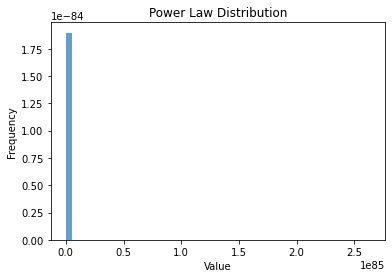

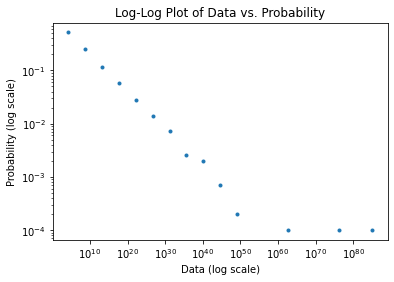

Calculating best minimal value for power law fit
Estimated exponent (alpha): 1.0703348524475822
Estimated lower bound (xmin): 1.0030918550353587
KS test statistic: 1.0
KS test p-value: 0.0


In [1]:
import powerlaw
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

## first trail generate synthetic data using powerlaw package, kstest not working!!!

# Set the desired parameters for the power law distribution
alpha = 1.07  # Exponent of the power law distribution
xmin = 1.0   # Lower bound of the power law distribution

# Generate synthetic data following a power law distribution
data = powerlaw.Power_Law(xmin=xmin, parameters=[alpha]).generate_random(10000)

# Plot the histogram of the generated data
plt.hist(data, bins=50, density=True, alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Power Law Distribution')
plt.show()

# Define the bins for counting values
bins = np.logspace(np.log10(np.min(data)), np.log10(np.max(data)), num=20)

# Count the number of values in each bin
hist, edges = np.histogram(data, bins=bins)
bin_centers = (edges[:-1] + edges[1:]) / 2.0

# Calculate the probabilities
probabilities = hist / len(data)

# Plot the log-log graph of data vs. probabilities
plt.loglog(bin_centers, probabilities, marker='o', linestyle='', markersize=3)

# Set the labels and title of the plot
plt.xlabel('Data (log scale)')
plt.ylabel('Probability (log scale)')
plt.title('Log-Log Plot of Data vs. Probability')

# Display the plot
plt.show()


# Perform the power law fit
results = powerlaw.Fit(data)

# Print the estimated exponent and lower bound of the power law distribution
print("Estimated exponent (alpha):", results.power_law.alpha)
print("Estimated lower bound (xmin):", results.power_law.xmin)

# Perform the Kolmogorov-Smirnov (KS) test
ks_statistic, p_value = kstest(data, 'powerlaw', args=(results.power_law.alpha,))
print("KS test statistic:", ks_statistic)
print("KS test p-value:", p_value)


In [2]:
import numpy as np
import scipy.stats as stats
from scipy.stats import powerlaw


## second trail generate synthetic data using scipy.stats.powerlaw package, kstest working!!!

# Set the desired parameters for the power-law distribution
alpha = 1.07  # Exponent of the power law distribution
xmin = 1.0   # Lower bound of the power law distribution

# Generate synthetic data following a power-law distribution
data = powerlaw.rvs(alpha, loc=0, scale=xmin, size=10000)
fit_params = stats.powerlaw.fit(data)
#print(data)
#synthetic_data = stats.powerlaw.rvs(*fit_params, size=len(data))
ks_statistic, p_value = stats.kstest(data, 'powerlaw', args=fit_params)
print(fit_params)
alpha = 0.05  # Significance level
print("p_value:", p_value)
if p_value > alpha:
    print("The data follows a power-law distribution.")
else:
    print("The data does not follow a power-law distribution.")


(1.076078198490715, 0.000389934413625757, 1.0024826591621978)
p_value: 0.46351652214081296
The data follows a power-law distribution.
